In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.cluster import rand_score, fowlkes_mallows_score

In [39]:
df = pd.read_csv("data_banknote_authentication.csv")
df

,V1,V2,V3,V4,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [40]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

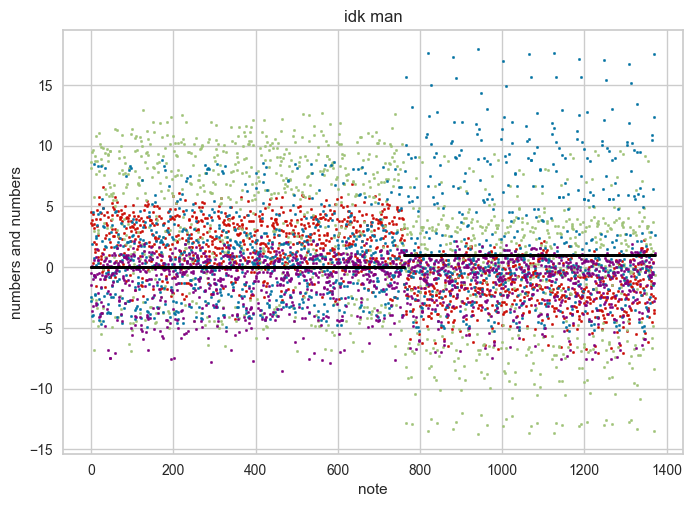

In [41]:
x = []
for i in range(len(df)):
    x.append(i)
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y = [y1,y2,y3,y4,y5]
ind = 0
for i in df:
    for j in df[i]:
        y[ind].append(j)
    ind+=1
    
plt.scatter(x,y1,color='r',s=3)
plt.scatter(x,y2,color='g',s=3)
plt.scatter(x,y3,color='b',s=3)
plt.scatter(x,y4,color='purple',s=3)
plt.scatter(x,y5,color='black',s=3)
plt.xlabel("note")
plt.ylabel("numbers and numbers")
plt.title("idk man")
plt.show

In [42]:
df_size = df.size
print("Dataset size:",df_size)
print("Dataset dimension:", df.ndim)
print("Dataset shape (r x c):", df.shape)
df.describe()

Dataset size: 6860
Dataset dimension: 2
Dataset shape (r x c): (1372, 5)


,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [43]:
x = df.iloc[:,0:4]
y = df.iloc[:,-1]

kmeans = KMeans(2)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, ..., 0, 0, 0])

C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may

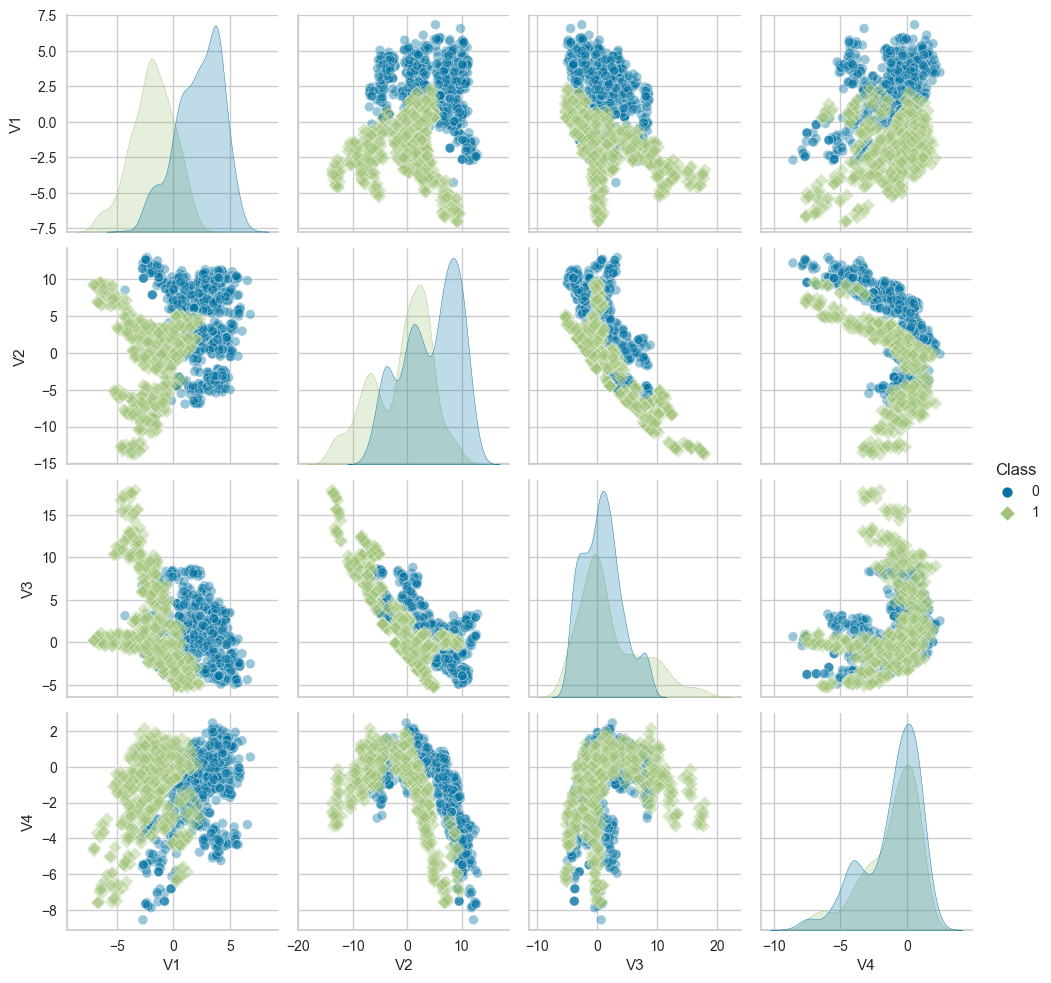

In [44]:
sns.pairplot(df, vars=['V1', 'V2', 'V3', 'V4'],
            hue = 'Class',
            markers = ['o', 'D', '+'],
            plot_kws = {'alpha': .4})

<AxesSubplot: >

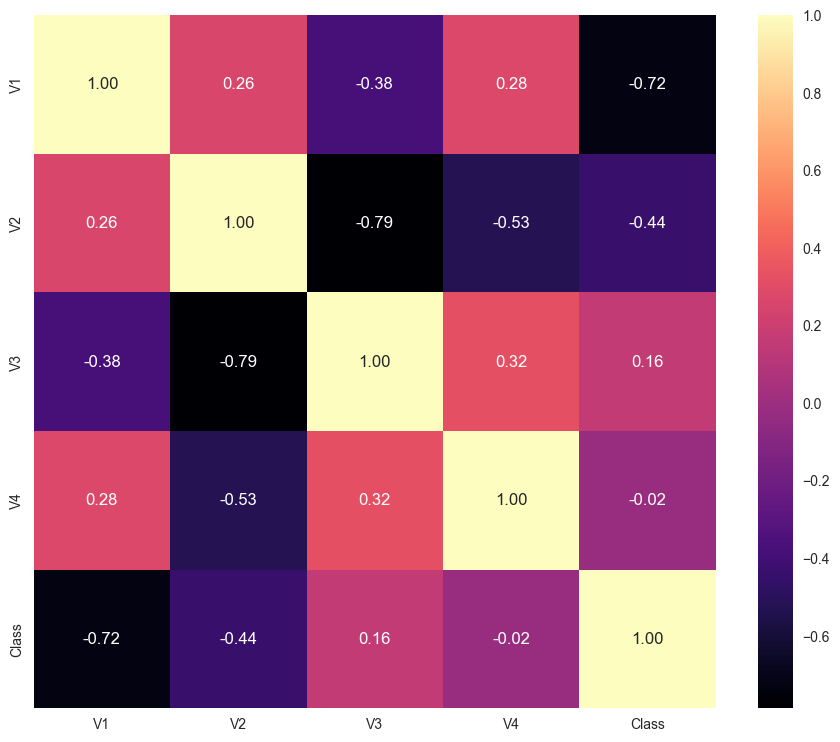

In [45]:
LE = LabelEncoder()
df['Class']=LE.fit_transform(df['Class'])

# Correlation heatmap
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [46]:
kmeans = df
kmeans['Class'] = identified_clusters
kmeans.head(5)

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,0


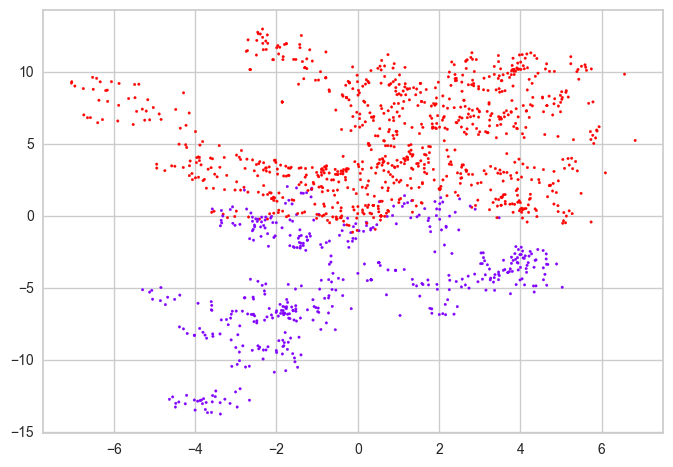

In [59]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['V1'],data_with_clusters['V2'],c=data_with_clusters['Clusters'],cmap='rainbow',s=3)  # 3 chunks of cluster

C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Text(0, 0.5, 'Within Cluster Sum of Squares')

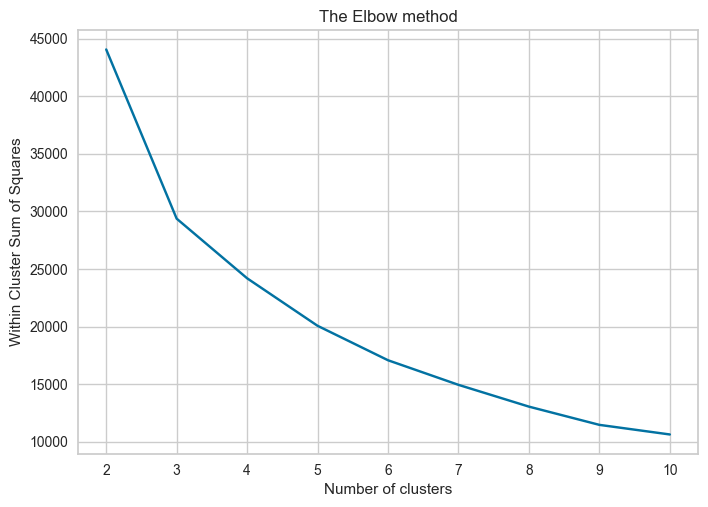

In [48]:
wcss=[]
for i in range(2,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(2,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


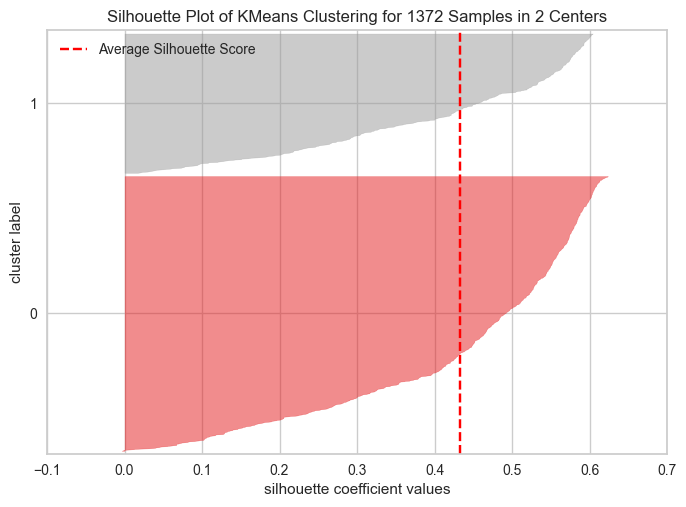

C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


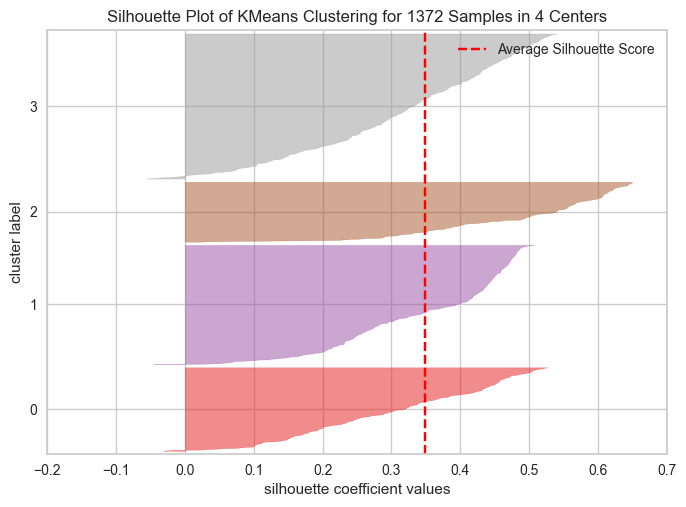

C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


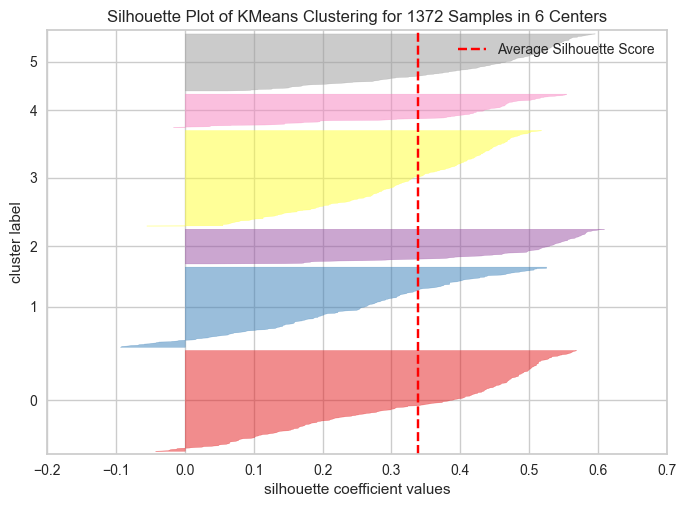

In [49]:
for i in range(2,7,2):
    m = KMeans(n_clusters=i)
    vis = SilhouetteVisualizer(m)
    vis.fit(x)
    vis.poof()

In [50]:
model = KMeans(n_clusters=2)
model.fit(x)
model.transform(x)
model.labels_

C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, ..., 1, 1, 1])

In [51]:
pd.crosstab(df['Class'], model.labels_)

col_0,0,1
Class,,
0,0,462
1,910,0


In [52]:
df.min()

V1       -7.0421
V2      -13.7731
V3       -5.2861
V4       -8.5482
Class     0.0000
dtype: float64

In [53]:
df.max()

V1        6.8248
V2       12.9516
V3       17.9274
V4        2.4495
Class     1.0000
dtype: float64

In [54]:
themins = []
themaxs = []
for i in range(4):
    themins.append(df.min()[i])
    themaxs.append(df.max()[i])

test = []
for i in range(len(df)):
    sample = []
    for j in range(4):
        sample.append(random.uniform(themins[j],themaxs[j]))
    test.append(sample)

test[:3]

[[5.98951272093494,
  -5.439993719178291,
  -1.1838295078146794,
  0.5283721838029081],
 [2.188856722234961,
  -3.2061522983119346,
  5.422061986943908,
  0.058546736867734595],
 [0.040131374475088855,
  12.13059804097216,
  10.903740309841954,
  1.9135448073439534]]

In [61]:
pred = model.predict(test)

C:\Users\fin_t\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [60]:
rand_score(df['Class'].values, pred)

0.5029696780243826

In [57]:
fowlkes_mallows_score(df['Class'].values, pred)

0.5382474789864793